<a href="https://colab.research.google.com/github/DigitalBiomarkerDiscoveryPipeline/Case_Studies/blob/main/eDTW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTW vs eDTW


> Jiang, Y., Qi, Y., Wang, W. K., Bent, B., Avram, R., Olgin, J., & Dunn,  J. (2020). EventDTW: An Improved Dynamic Time Warping Algorithm for Aligning Biomedical Signals of Nonuniform Sampling Frequencies. Sensors (Basel, Switzerland), 20(9), 2700. https://doi.org/10.3390/s20092700





---

**Objectives**

We propose a Dynamic Time Warping (DTW) algorithm called EventDTW (eDTW) which uses information propagated from defined events as basis for path matching and hence sequence alignment. We will compare the results of signal alignment from DTW vs eDTW. For this case study, we use the ECG signal from SciPy.

**You will learn to**
- Observe and understand the limitation of DTW
- Perform DTW and eDTW using the Preprocess module from DBDP
- Visualize of the pre-aligned and aligned signals
- Compare the results of signal alignment by using appropriate metrics

# Background

**What is Dynamic time warping (DTW)? 📉**

DTW is a way to match two sequences of data so that they line up in time. Even if the two signals have some differences in how they change over time (i.e., trend), DTW matches the signals by minimizing the cumulative point-to-point distances.

**Disadvantage of DTW 🛑**

But sometimes DTW doesn't work well when the data is measured at different frequencies or has unequal number of measurements. This can cause problems where one data point is matched with too many others, making the alignment uneven.


**eDTW 📈**

To fix this, a new method called EventDTW (eDTW) looks for important changes in the data (like peaks) and uses that to line up the two sequences. It's better than other DTW methods because it takes into account more detailed information about the data.

However, when using eDTW, there's a setting called **event frequency** that needs to be pre-set by the user. This setting determines how many *important changes* will be used to line up the data. By pre-setting the number of important changes for the algorithm to look for, eDTW can limit noise or artifacts in the data and only match the most important changes.

# Setup

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import sys
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

## Import DBDP Module

In [ ]:
!rm -rf Pre-process/
!git clone https://github.com/DigitalBiomarkerDiscoveryPipeline/Pre-process.git

Cloning into 'Pre-process'...
remote: Enumerating objects: 330, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 330 (delta 57), reused 81 (delta 35), pack-reused 206
Receiving objects: 100% (330/330), 31.70 MiB | 7.24 MiB/s, done.
Resolving deltas: 100% (106/106), done.
Updating files: 100% (154/154), done.


In [ ]:
sys.path.insert(0, '/content/Pre-process/Signal-Alignment/')
import debug.dtw as dtw
from debug.parameter_cal.utils import get_fact_align, get_SS1, get_SS2, get_reverse_dict, calculate_event, true_align_graph, get_link_graph, load_data, exp_decay
from debug.parameter_cal.utils import plot_warped_signals, cal_warped_signals, get_event_graph, get_upslope_endings, get_downslope_endings, edge_matching
from debug.downsample.utils import get_true_aligned, get_group_number, get_k_accuracy, get_matched_graph, connect_edges
from debug.dbd_cf import debug_file, debug_line
import debug.parameter_cal.cf as cf

# Import Dataset

In [ ]:
y_list = load_data(debug_file, debug_line)

from scipy.misc import electrocardiogram
ecg = electrocardiogram()
y_list = ecg[50:400]

<ipython-input-4-56f009bbdff9>:4: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg = electrocardiogram()


## Visualize True Signal

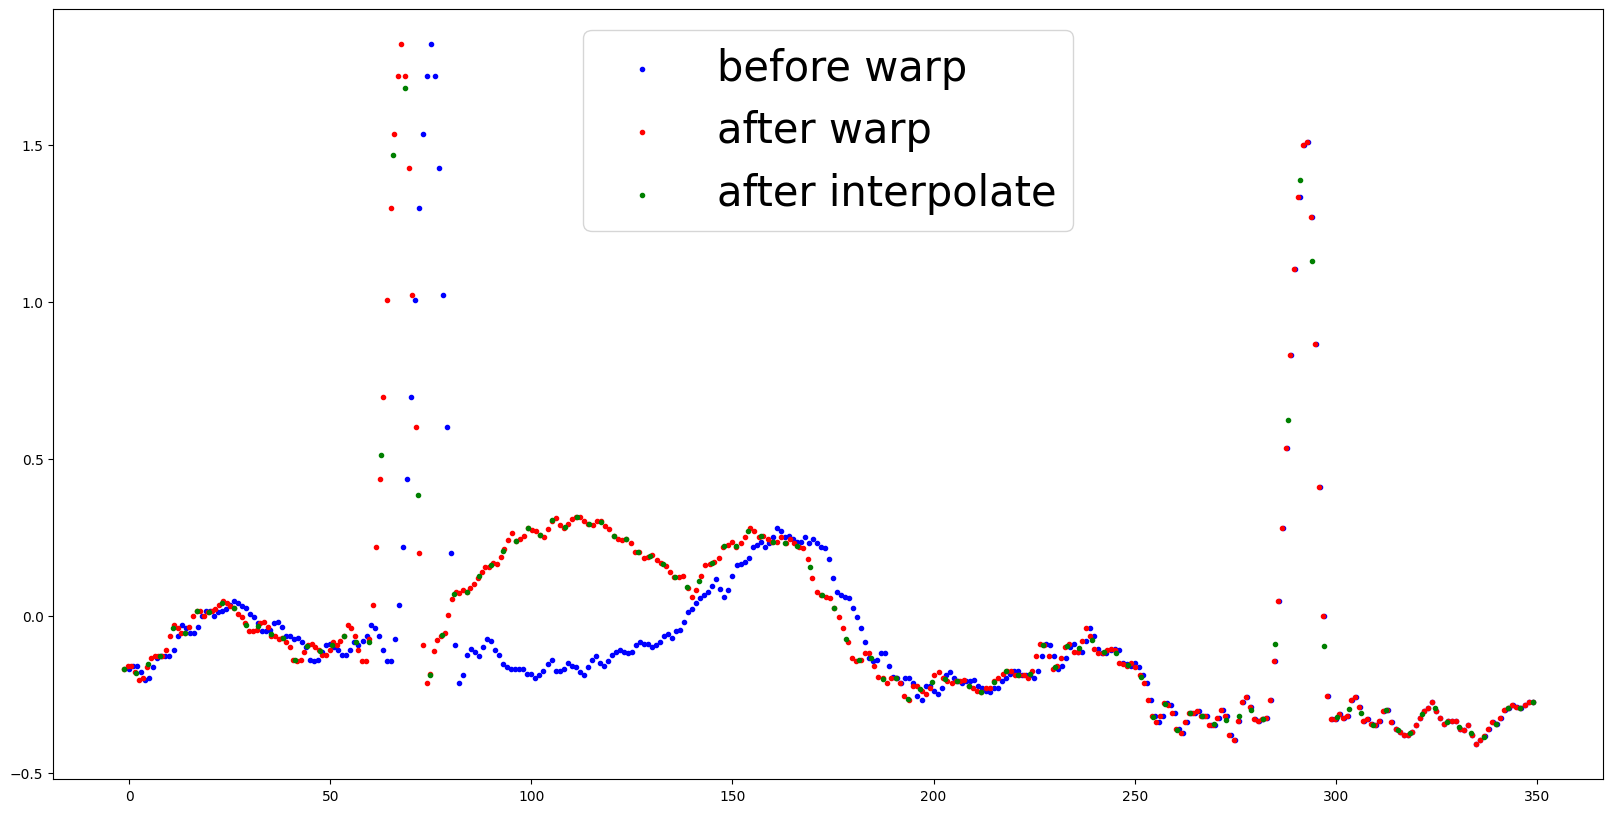

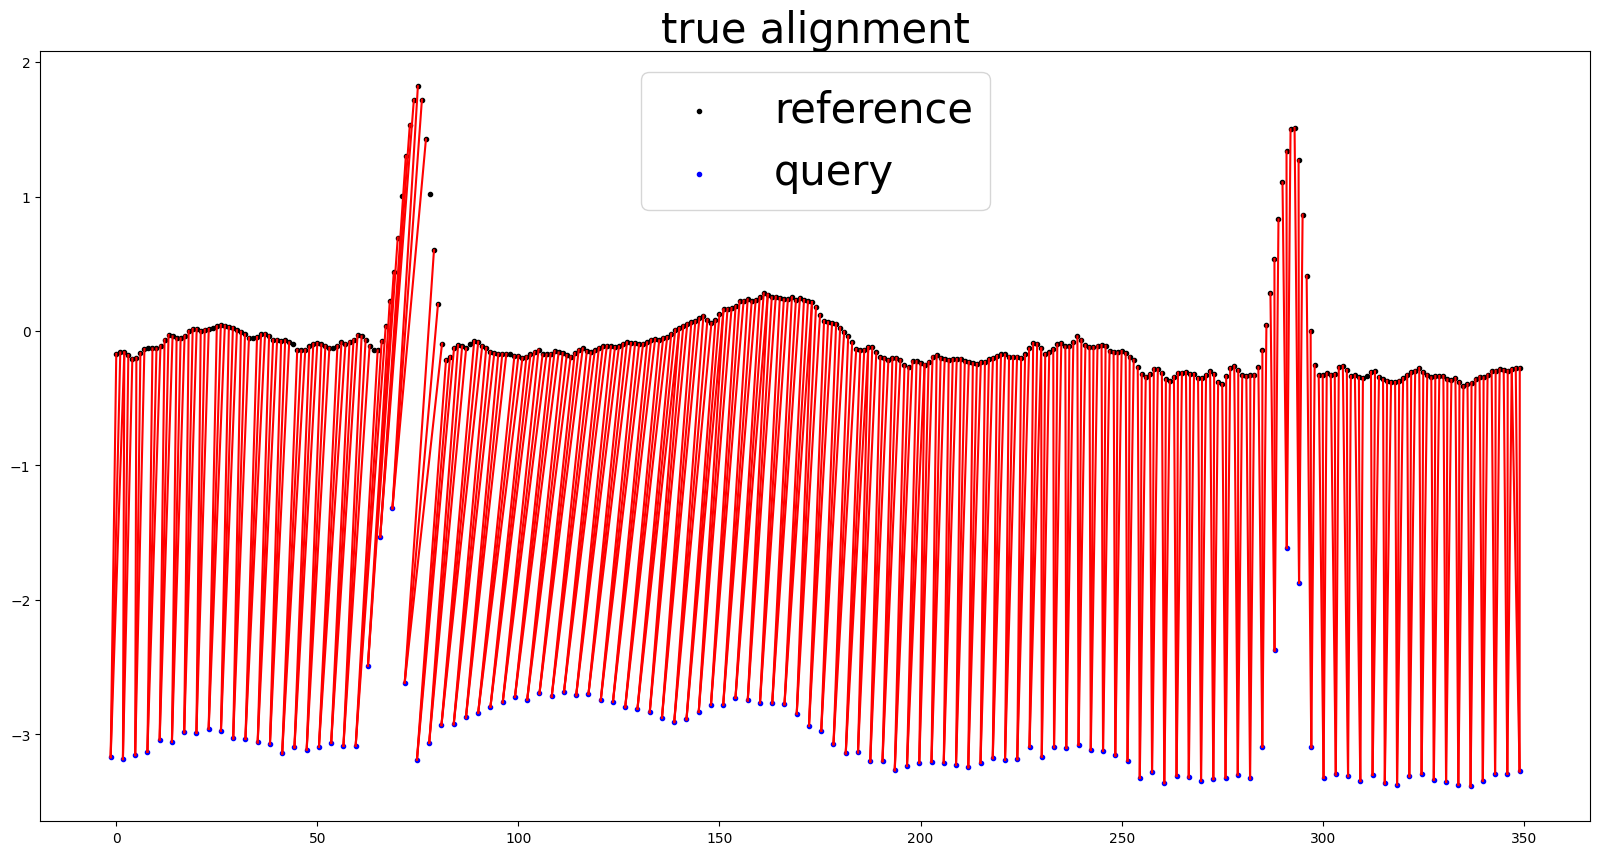

In [ ]:

# helper function: normalization

def norm(x, y):
    return math.fabs(x[1] - y[1]) + math.fabs(x[2] - y[2]) + math.fabs(x[3] - y[3])

query, reference = cal_warped_signals(y_list)

reference['upslope'] = 0
reference['downslope'] = 0

# plot warped signal
# downsample times
xvals, yinterp = plot_warped_signals(reference, query, cf.ds_time)

# calculate the corresponding point pair
query.drop('shift', axis=1)
query.drop('t', axis=1)
query2 = pd.DataFrame({'t': xvals, 'q': yinterp})
query2['close_index'] = 0
query2['upslope'] = 0
query2['downslope'] = 0
true_align_dict = get_true_aligned(cf.ds_time, query, query2)

group_num_dict = get_group_number(true_align_dict, query)
plt.show()
true_align_graph(true_align_dict, reference, query2, -3)

# Perform DTW

../data/ECGFiveDays_TRAIN 5


<ipython-input-6-9262e46c885f>:10: DeprecationWarning: scipy.misc.electrocardiogram has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.electrocardiogram instead.
  ecg = electrocardiogram()


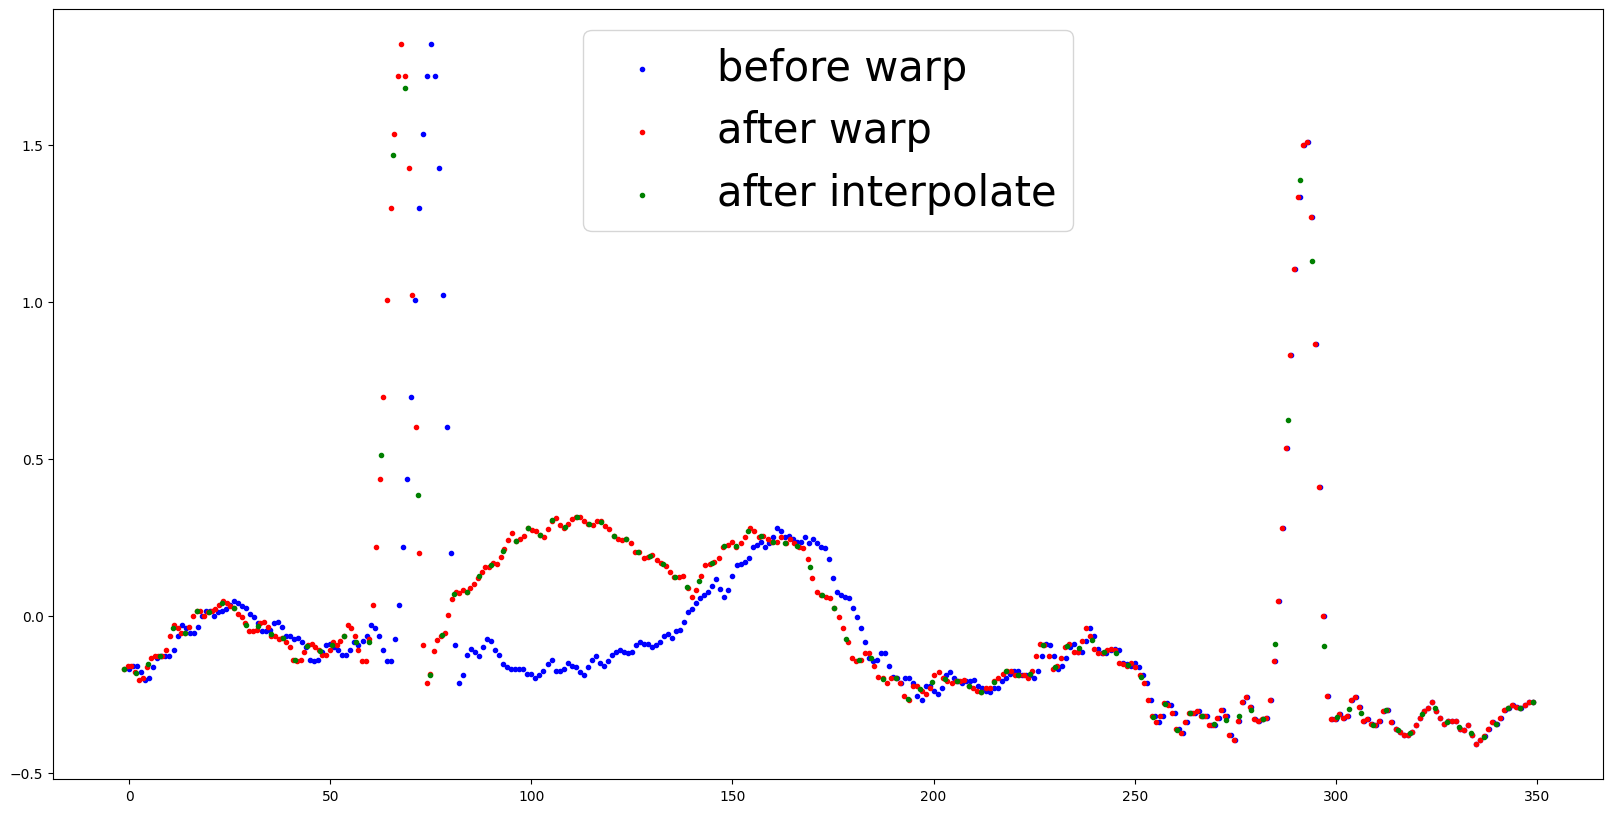

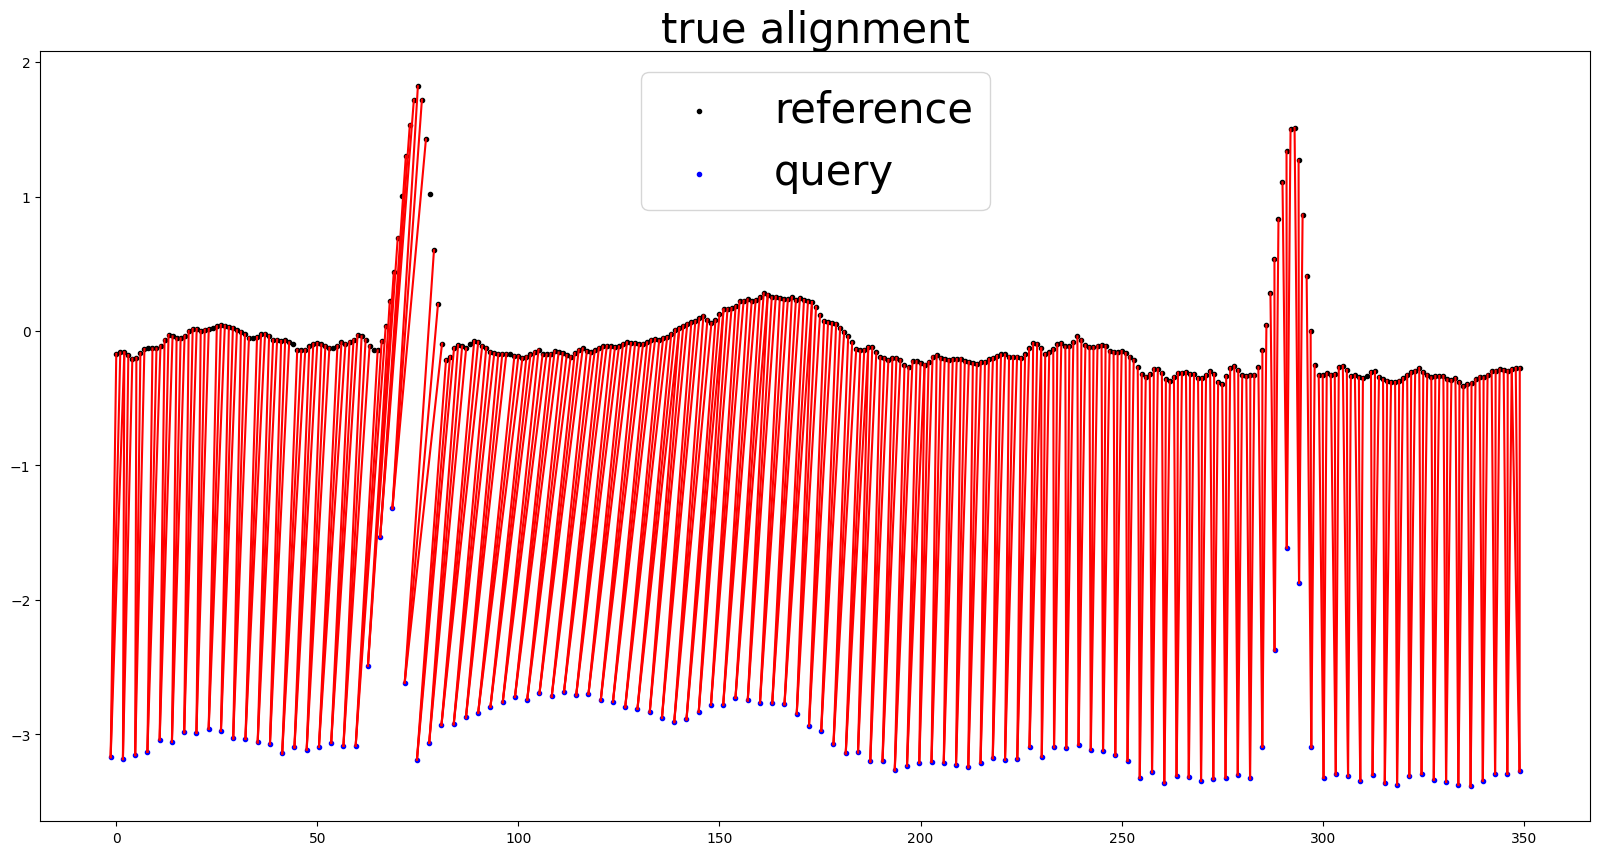

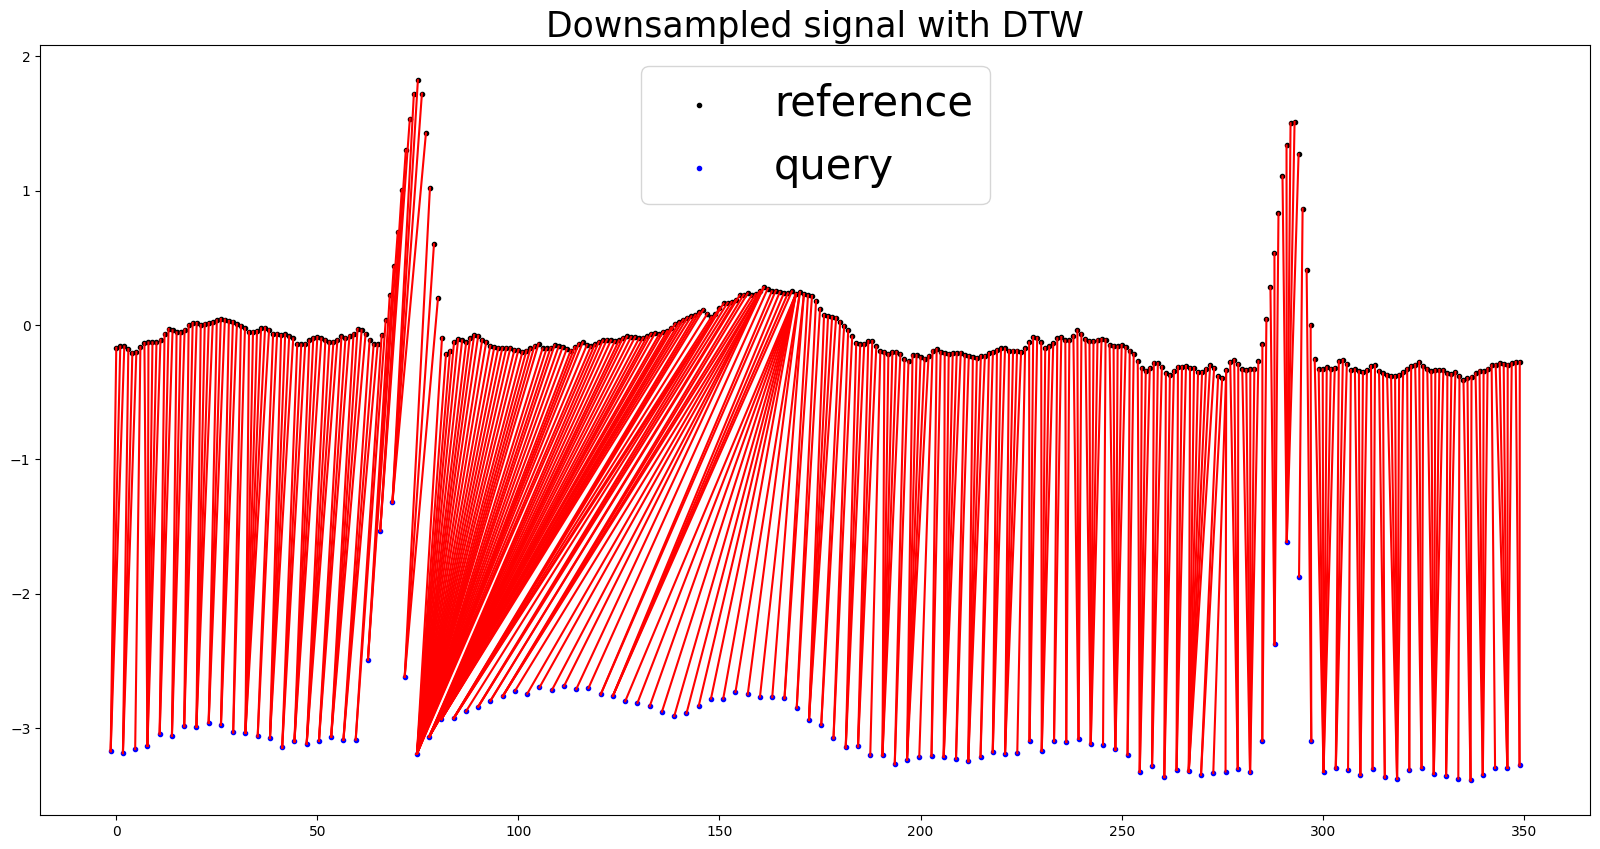

group = 0.0434407796101949
sum of devi SS1 is 191.0
SS1 of dtw is 1.646551724137931
sum of devi SS2 is 1880.3611111111115
SS2 of dtw is 16.210009578544064


In [ ]:
def norm(x, y):
    return math.fabs(x[1] - y[1])

print(debug_file,debug_line)
debug_line=8

y_list = load_data(debug_file, debug_line)

from scipy.misc import electrocardiogram
ecg = electrocardiogram()
y_list = ecg[50:400]


query, reference = cal_warped_signals(y_list)

# plot warped signal
# downsample times
xvals, yinterp = plot_warped_signals(reference, query, cf.ds_time)

# calculate the corresponding point pair
query.drop('shift', axis=1)
query.drop('t', axis=1)
query2 = pd.DataFrame({'t': xvals, 'q': yinterp})
query2['close_index'] = 0
true_align_dict = get_true_aligned(cf.ds_time, query, query2)
group_num_dict = get_group_number(true_align_dict, query)
true_align_graph(true_align_dict, reference, query2, -3)

d, cost_matrix, acc_cost_matrix, path = dtw.dtw(reference[['t', 'q']].values, query2[['t', 'q']].values, dist=norm)
get_link_graph(reference, query2, path, -3, 'Downsampled signal with DTW')
fact_align_dict = get_fact_align(path)
reverse_dict = get_reverse_dict(path)
print('group = '+str(get_k_accuracy(true_align_dict, fact_align_dict, group_num_dict)))
print("SS1 of dtw is " + str(get_SS1(fact_align_dict, cf.ds_time)))
print("SS2 of dtw is " + str(get_SS2(fact_align_dict, reverse_dict, cf.ds_time)))

# Perform EventDTW

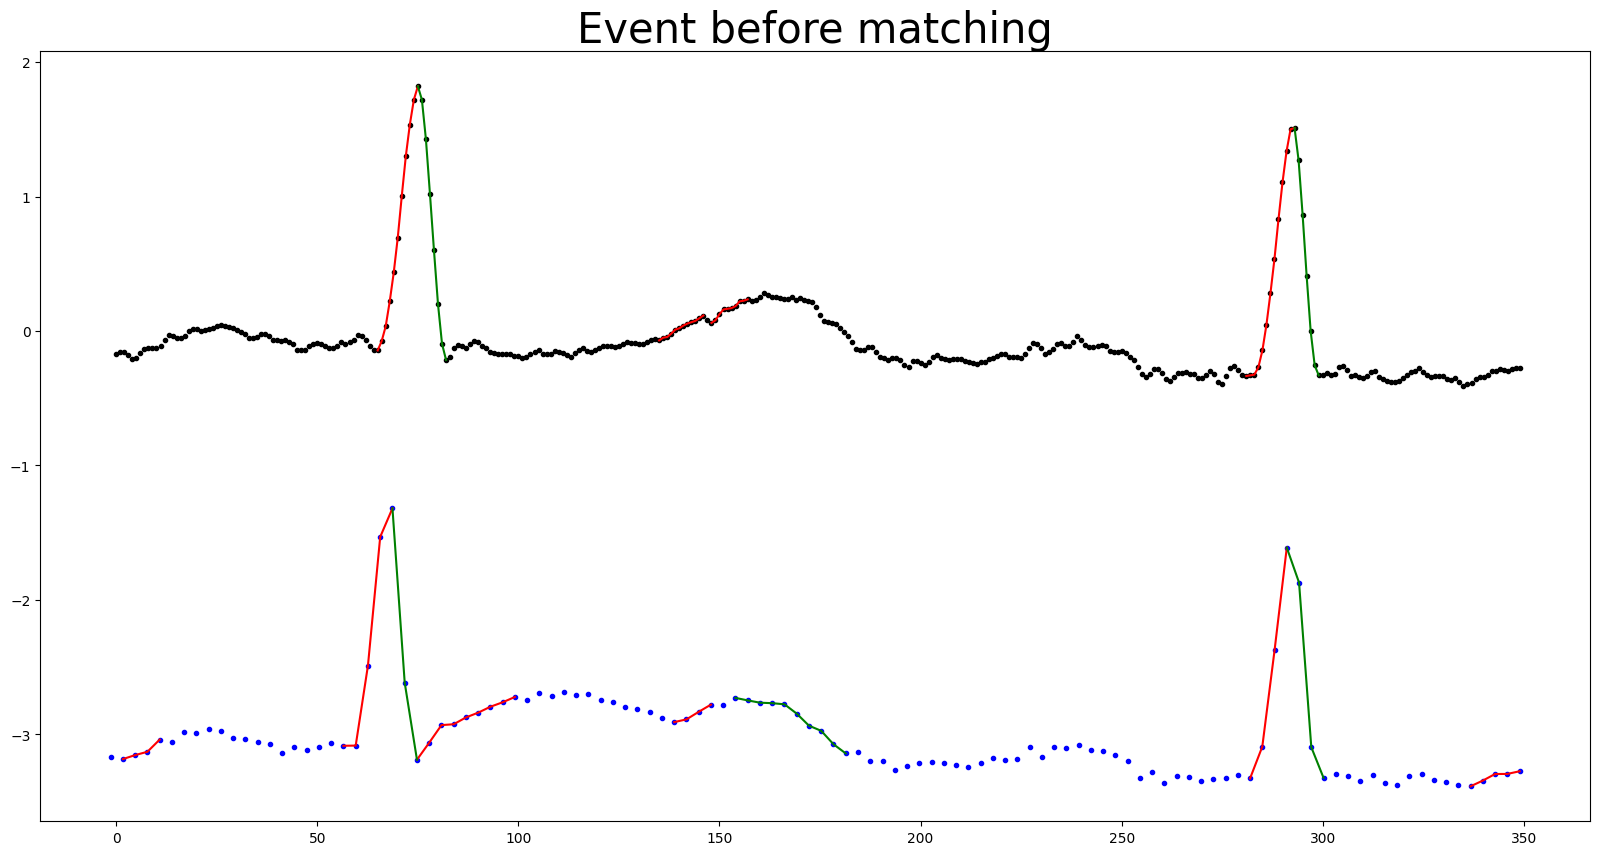

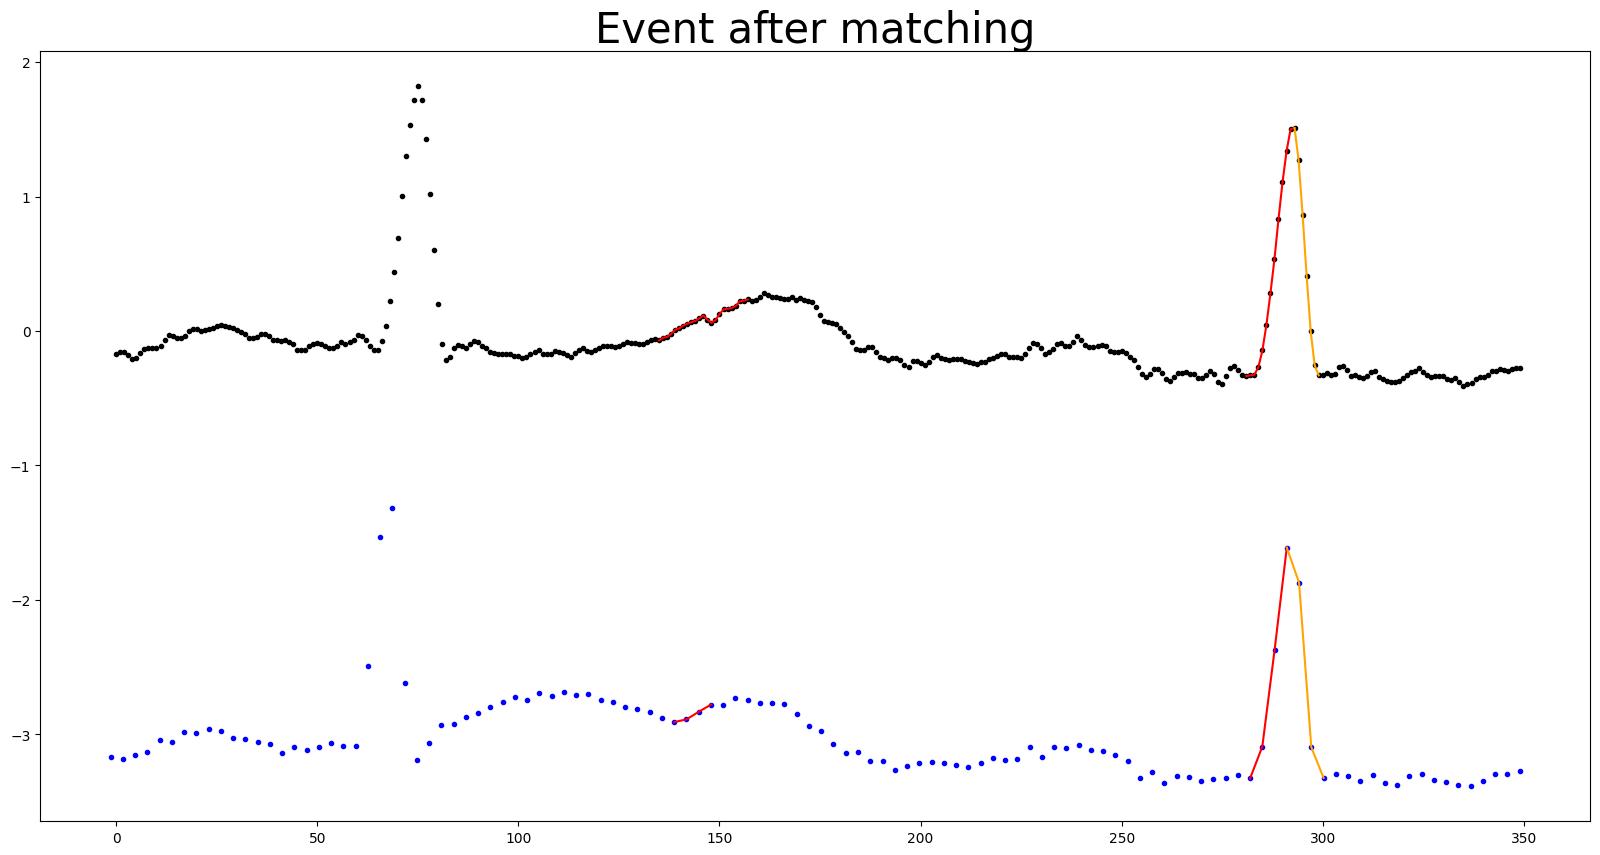

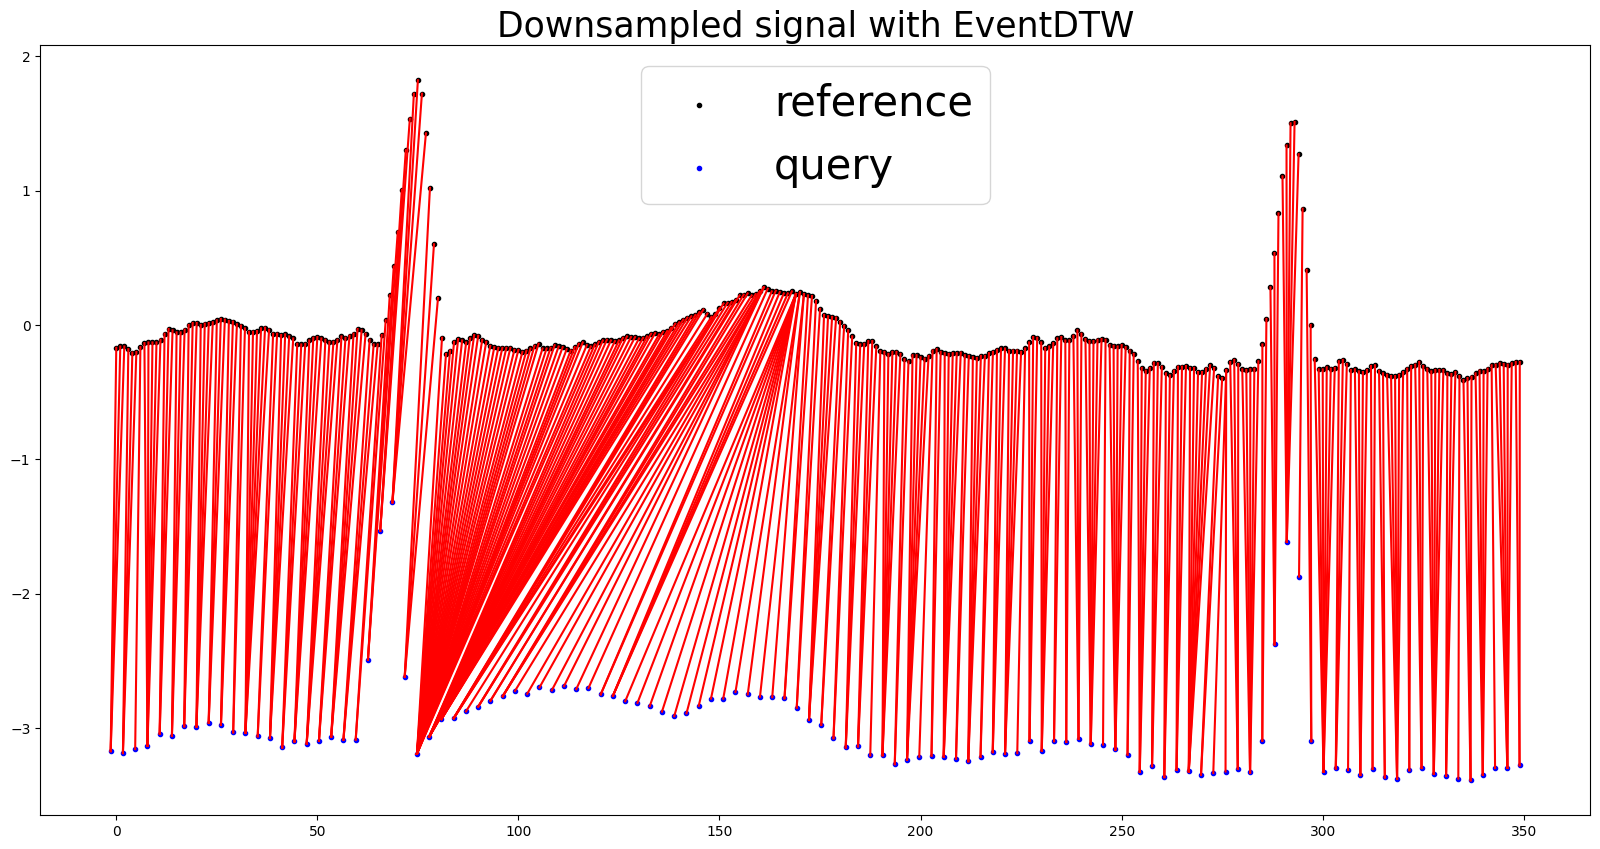

group = 0.0434407796101949
sum of devi SS1 is 191.0
SS1 of dtw is 1.646551724137931
sum of devi SS2 is 1880.3611111111115
SS2 of dtw is 16.210009578544064


In [ ]:
sort_by_time_reference_uslope, reference_upslope = get_upslope_endings(reference['q'], cf.refer_percent, cf.min_product)
sort_by_time_query_uslope, query_upslope = get_upslope_endings(query2['q'], cf.query_percent, cf.min_product / cf.ds_time)

sort_by_time_reference_downslope, reference_downslope = get_downslope_endings(reference['q'], cf.refer_percent, cf.min_product)
sort_by_time_query_downslope, query_downslope = get_downslope_endings(query2['q'], cf.query_percent, cf.min_product / cf.ds_time)

get_event_graph(reference, query2, reference_upslope, query_upslope, reference_downslope, query_downslope, -3,
                'Event before matching')
reference_upslope = connect_edges(sort_by_time_reference_uslope, round(len(reference)/len(query2)))
reference_downslope = connect_edges(sort_by_time_reference_downslope, round(len(reference)/len(query2)))
rising_edge_grps = edge_matching(reference, query2, reference_upslope, query_upslope)
down_edge_grps = edge_matching(reference, query2, reference_downslope, query_downslope)
get_matched_graph(rising_edge_grps, down_edge_grps, reference, query2, -3, 'Event after matching')

calculate_event(rising_edge_grps, reference, query2, True)
calculate_event(down_edge_grps, reference, query2, False)
d, cost_matrix, acc_cost_matrix, path = dtw.dtw(reference[['t', 'q', 'upslope', 'downslope']].values,
                                            query2[['t', 'q', 'upslope', 'downslope']].values, dist=norm)
get_link_graph(reference, query2, path, -3, 'Downsampled signal with EventDTW')
fact_align_dict = get_fact_align(path)
reverse_dict = get_reverse_dict(path)
print('group = ' + str(get_k_accuracy(true_align_dict, fact_align_dict, group_num_dict)))
print("SS1 of dtw is " + str(get_SS1(fact_align_dict, cf.ds_time)))
print("SS2 of dtw is " + str(get_SS2(fact_align_dict, reverse_dict, cf.ds_time)))

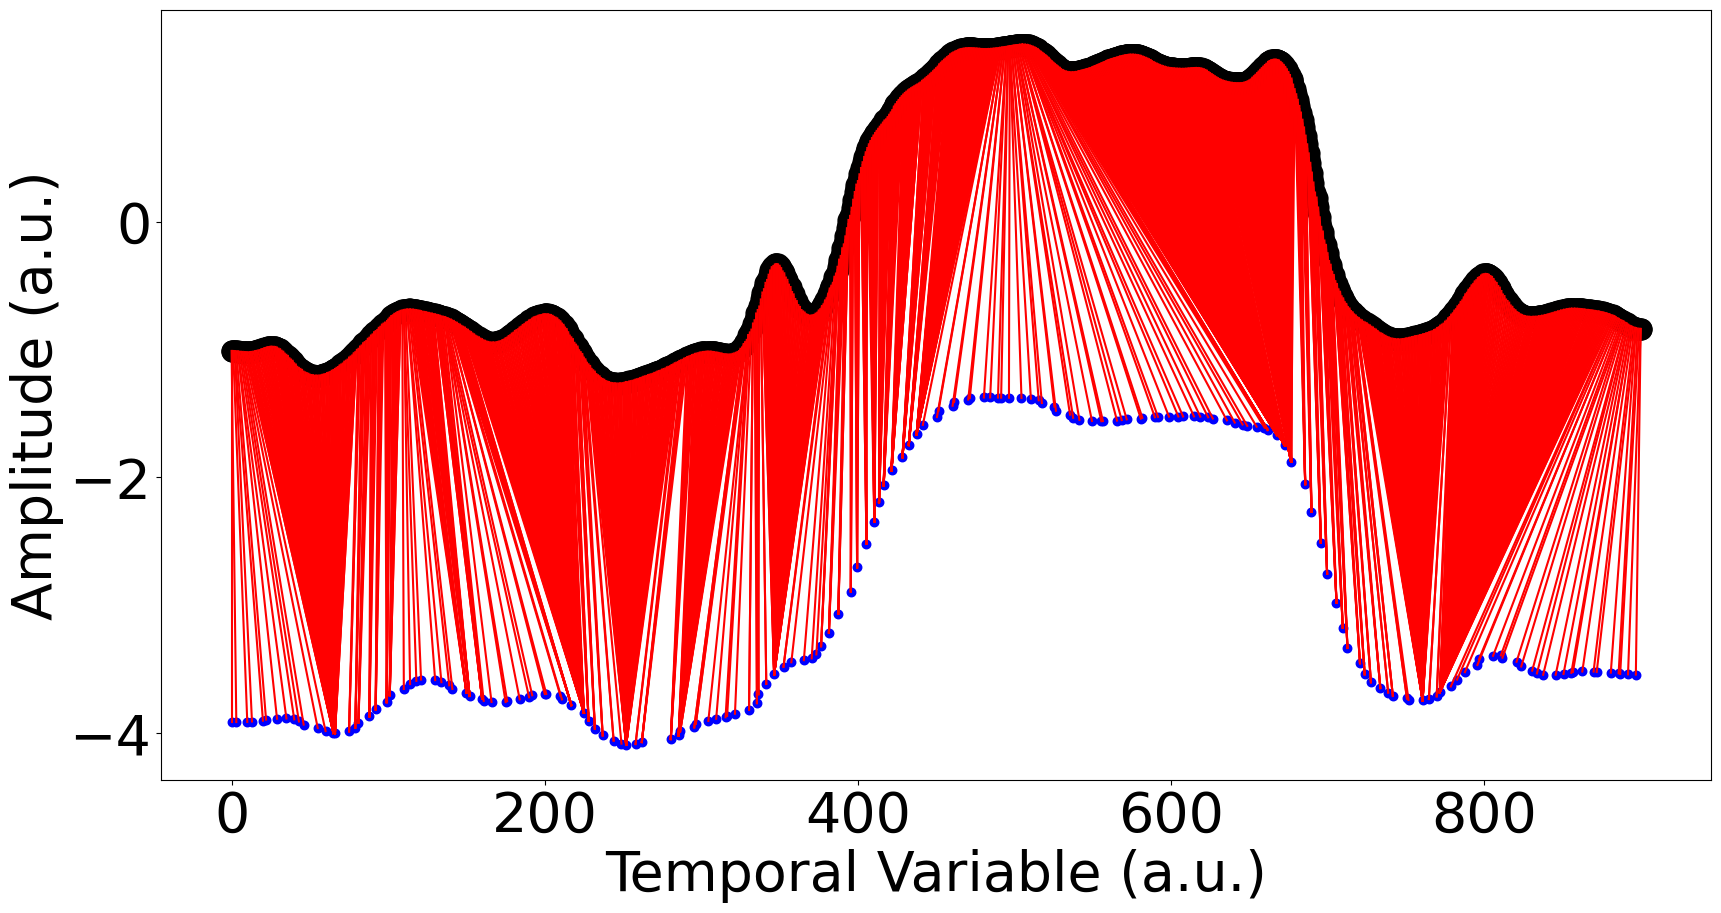

sum of devi SS1 is 1444.0
SS1 of dtw is 8.067039106145252
sum of devi SS2 is 121909.94999999998
SS2 of dtw is 681.0611731843575


In [ ]:
from scipy import stats
from matplotlib.lines import Line2D

def get_link_graph(x, y, path, vertical_mov, title=None, xlabel=None):
    xlabel = 'Temporal Variable (a.u.)'
    ylabel = 'Amplitude (a.u.)'
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.scatter(x['t'], x['q'], linewidth=10, c='k')
    ax.scatter(y['t'], y['q'] + vertical_mov, s=150, c='b', marker='.', label='PPG')
    # ax.legend(fontsize=35)
    # ax.spines['top'].set_visible()
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(True)
    # ax.spines['right'].set_visible(False)
    # ax.set_xticks([])
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    for i in range(len(path[0])):
        head_num = path[0][i]
        tail_num = path[1][i]
        plt.plot((x['t'].values[head_num], y['t'].values[tail_num]),
                 (x['q'].values[head_num], y['q'].values[tail_num] + vertical_mov), 'r')
    if xlabel is not None:
        ax.set_xlabel(xlabel, fontsize=40)
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=40)
        # plt.savefig('../paper_fig/'+xlabel+'.jpg', bbox_inches='tight')
    plt.show()


def norm(x, y):
    return math.fabs(x[1] - y[1])

root_data_dir = "./Pre-process/Signal-Alignment/csv/"
ddtw_result = pd.DataFrame(columns=['num','SS'])

num_str = '05'
data_dir = root_data_dir + '19-0'+ num_str
reference = pd.read_csv(data_dir+'ECG.csv', engine='python')
query2 = pd.read_csv(data_dir+'AW.csv', engine='python')

d, cost_matrix, acc_cost_matrix, path = dtw.dtw(reference[['t', 'q']].values, query2[['t', 'q']].values, dist=norm)
get_link_graph(reference, query2, path, -3, None)
fact_align_dict = get_fact_align(path)
reverse_dict = get_reverse_dict(path)

print("SS1 of dtw is " + str(get_SS1(fact_align_dict, cf.ds_time)))
print("SS2 of dtw is " + str(get_SS2(fact_align_dict, reverse_dict, cf.ds_time)))

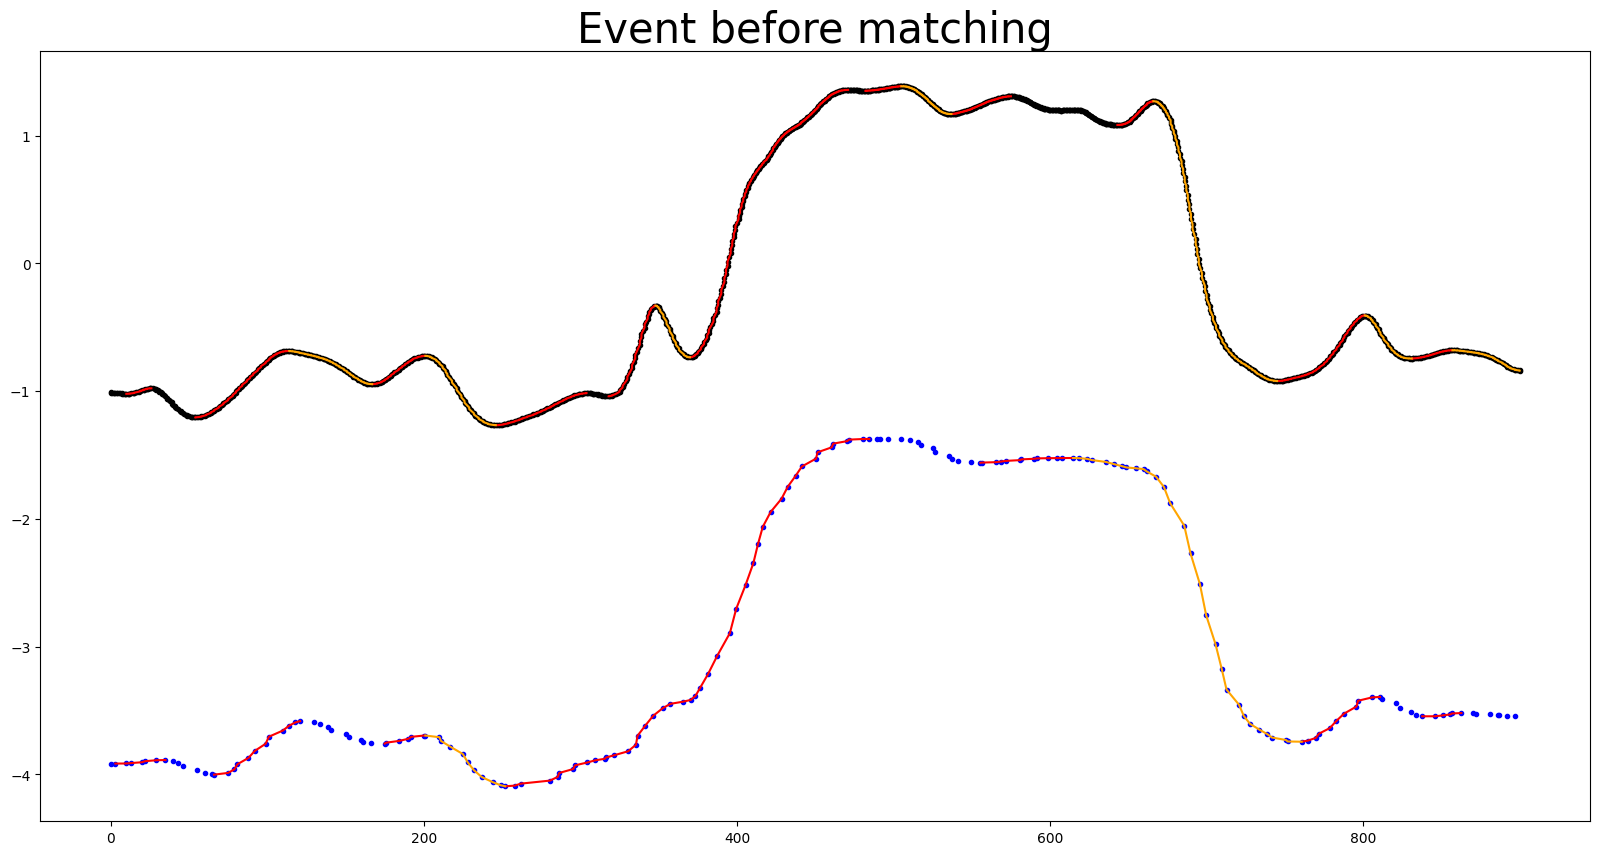

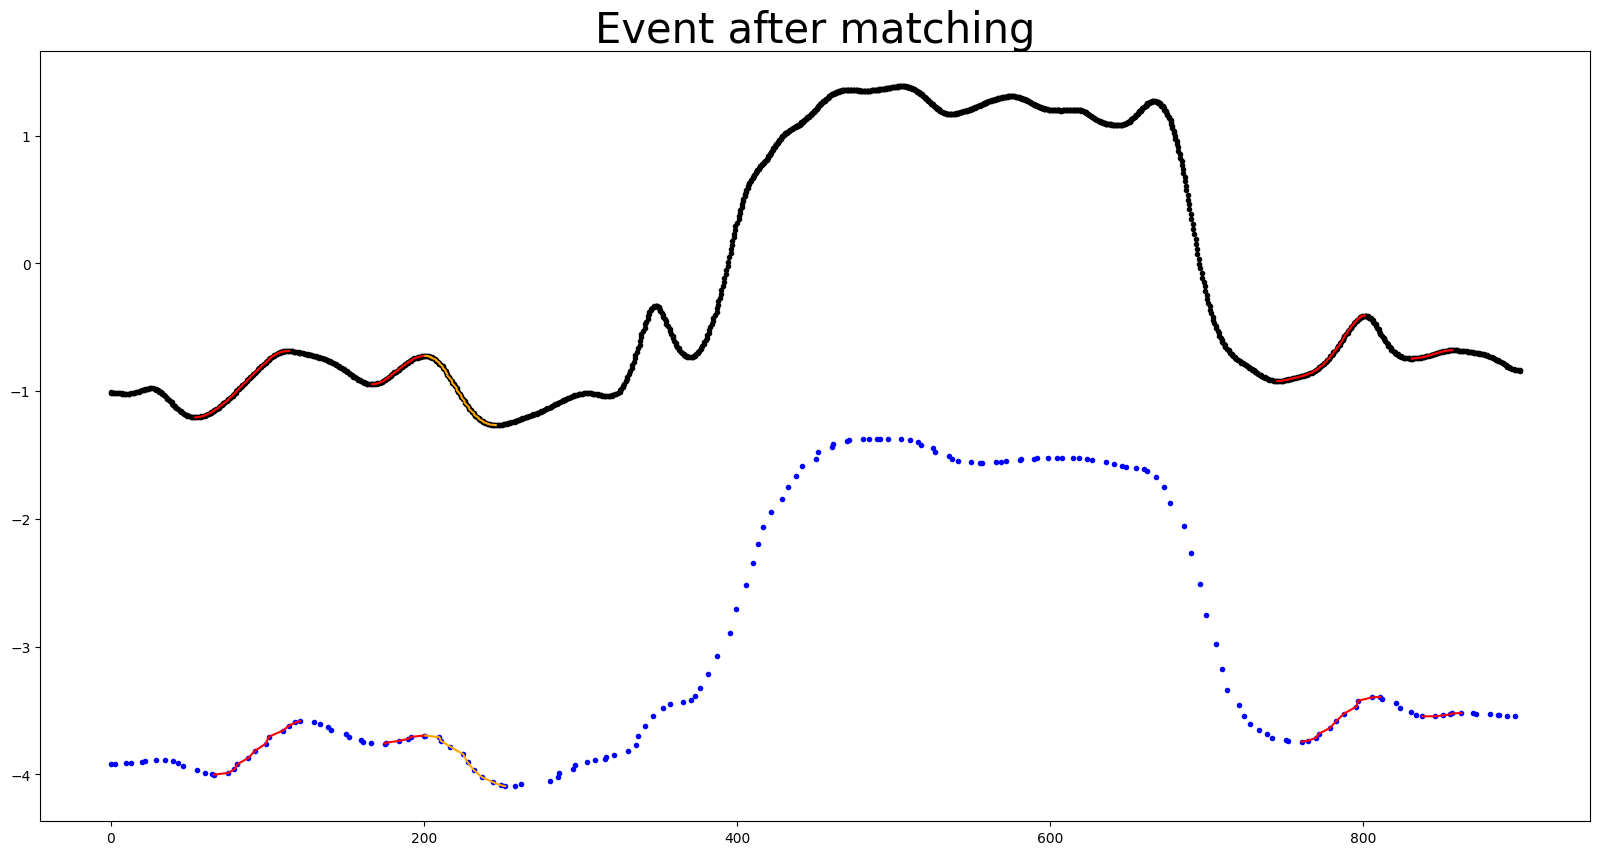

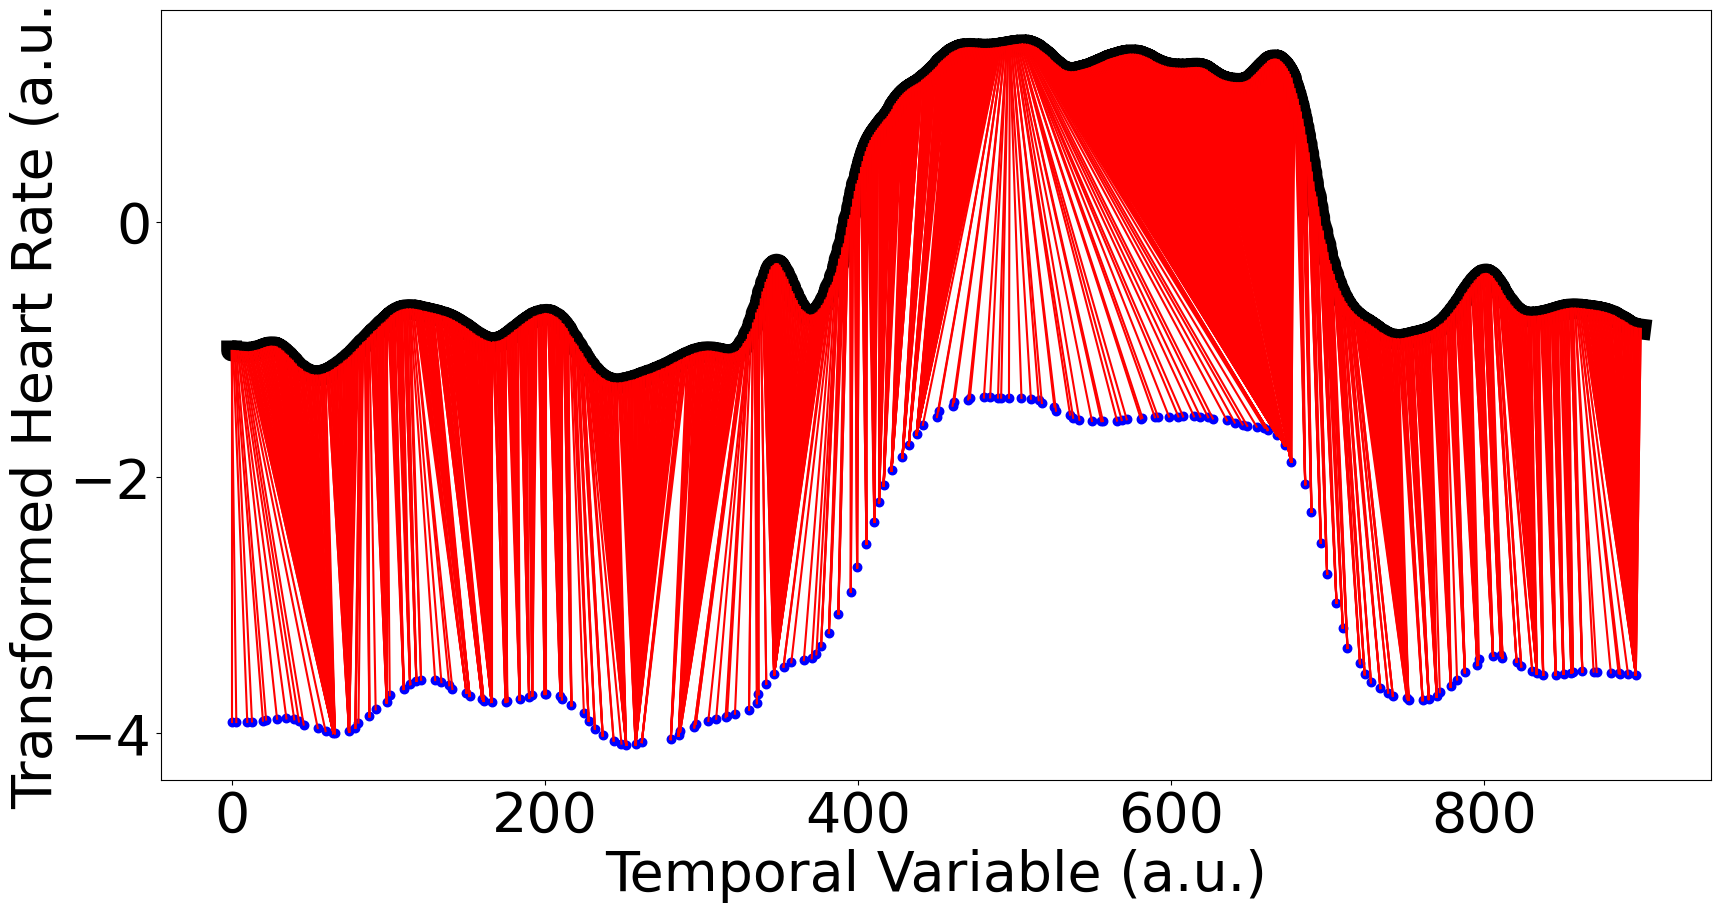

sum of devi SS1 is 1331.0
SS1 of eventdtw is 7.435754189944134
sum of devi SS2 is 86088.7
SS2 of eventdtw is 480.94245810055867


In [ ]:
def get_link_graph(x, y, path, vertical_mov, title=None, xlabel=None):
    xlabel = 'Temporal Variable (a.u.)'
    # xlabel = None
    ylabel = 'Transformed Heart Rate (a.u.)'
    legend_elements = [Line2D([0], [0], marker='o',color='w',label='ECG',markerfacecolor='black',markersize=20),
                       Line2D([0], [0], marker='o',color='w',label='PPG',markerfacecolor='blue',markersize=30)]
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.plot(x['t'], x['q'], linewidth=15, c='k')
    ax.scatter(y['t'], y['q'] + vertical_mov, s=150, c='b', marker='.')
    # ax.spines['top'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    ax.tick_params(axis="x", labelsize=40)
    ax.tick_params(axis="y", labelsize=40)
    # ax.legend(handles=legend_elements, fontsize=35)
    for i in range(len(path[0])):
        head_num = path[0][i]
        tail_num = path[1][i]
        plt.plot((x['t'].values[head_num], y['t'].values[tail_num]),
                 (x['q'].values[head_num], y['q'].values[tail_num] + vertical_mov), 'r')
    if xlabel is not None:
        ax.set_xlabel(xlabel, fontsize=40)
    else:
        ax.set_xticks([])
    if ylabel is not None:
        ax.set_ylabel(ylabel, fontsize=40)
    else:
        ax.set_yticks([])
    #plt.savefig('../paper_fig/'+xlabel+'.jpg', bbox_inches='tight')
    plt.show()


def get_event_graph(x, y, refer_up, query_up, refer_down, query_down, vertical_mov, title=None):
    x_list = x.values
    plt.figure(figsize=(20, 10))
    plt.scatter(x['t'], x['q'], c='k', marker='.', label='reference')
    plt.scatter(y['t'], y['q'] + vertical_mov, c='b', marker='.', label='query')
    for i in range(0, len(refer_up)):
        st = int(refer_up.iloc[i]['st'])
        ed = int(refer_up.iloc[i]['ed'])
        plt.plot(x['t'].loc[st:ed], x['q'].loc[st:ed], color='r')
    for i in range(0, len(query_up)):
        st = int(query_up.iloc[i]['st'])
        ed = int(query_up.iloc[i]['ed'])
        plt.plot(y['t'].loc[st:ed], y['q'].loc[st:ed] + vertical_mov, color='r')
    for i in range(0, len(refer_down)):
        st = int(refer_down.iloc[i]['st'])
        ed = int(refer_down.iloc[i]['ed'])
        plt.plot(x['t'].loc[st:ed], x['q'].loc[st:ed], color='orange')
    for i in range(0, len(query_down)):
        st = int(query_down.iloc[i]['st'])
        ed = int(query_down.iloc[i]['ed'])
        plt.plot(y['t'].loc[st:ed], y['q'].loc[st:ed] + vertical_mov, color='orange')
    plt.title(label=title, fontsize='30')
    plt.show()


def get_matched_graph(rising_edge_grps, down_edge_grps, x, y, vertical_mov, title=None):
    x_list = x.values
    plt.figure(figsize=(20, 10))
    plt.scatter(x['t'], x['q'], c='k', marker='.', label='reference')
    plt.scatter(y['t'], y['q'] + vertical_mov, c='b', marker='.', label='query')
    for i in range(0, len(rising_edge_grps)):
        refer_st = int(rising_edge_grps.iloc[i]['refer_st'])
        refer_ed = int(rising_edge_grps.iloc[i]['refer_ed'])
        query_st = int(rising_edge_grps.iloc[i]['query_st'])
        query_ed = int(rising_edge_grps.iloc[i]['query_ed'])
        plt.plot(x['t'].loc[refer_st:refer_ed], x['q'].loc[refer_st:refer_ed], color='r')
        plt.plot(y['t'].loc[query_st:query_ed], y['q'].loc[query_st:query_ed] + vertical_mov, color='r')

    for i in range(0, len(down_edge_grps)):
        refer_st = int(down_edge_grps.iloc[i]['refer_st'])
        refer_ed = int(down_edge_grps.iloc[i]['refer_ed'])
        query_st = int(down_edge_grps.iloc[i]['query_st'])
        query_ed = int(down_edge_grps.iloc[i]['query_ed'])
        plt.plot(x['t'].loc[refer_st:refer_ed], x['q'].loc[refer_st:refer_ed], color='orange')
        plt.plot(y['t'].loc[query_st:query_ed], y['q'].loc[query_st:query_ed] + vertical_mov, color='orange')
    plt.title(label=title, fontsize='30')
    plt.show()


def norm(x, y):
    #return math.fabs(x[1] - y[1])
    return math.fabs(x[1] - y[1])+math.fabs(x[2] - y[2])+math.fabs(x[3] - y[3])


num_str = '05'
reference = pd.read_csv('./Pre-process/Signal-Alignment/csv/19-0'+num_str+'ECG.csv')
query2 = pd.read_csv('./Pre-process/Signal-Alignment/csv/19-0'+num_str+'AW.csv')
reference['q']=stats.zscore(reference['q'])
query2['q'] = stats.zscore(query2['q'])
y_list = reference['q']
reference['upslope'] = 0
reference['downslope'] = 0
query2['upslope'] = 0
query2['downslope'] = 0


sort_by_time_reference_uslope, reference_upslope = get_upslope_endings(reference['q'], 0.9, cf.min_product)
sort_by_time_query_uslope, query_upslope = get_upslope_endings(query2['q'], 0.9, cf.min_product / cf.ds_time)

sort_by_time_reference_downslope, reference_downslope = get_downslope_endings(reference['q'], 0.9, cf.min_product)
sort_by_time_query_downslope, query_downslope = get_downslope_endings(query2['q'], 0.9, cf.min_product / cf.ds_time)

get_event_graph(reference, query2, reference_upslope, query_upslope, reference_downslope, query_downslope, -3,
                'Event before matching')
reference_upslope = connect_edges(sort_by_time_reference_uslope, int(len(reference)/len(query2)))
reference_downslope = connect_edges(sort_by_time_reference_downslope, int(len(reference)/len(query2)))
rising_edge_grps = edge_matching(reference, query2, reference_upslope, query_upslope)
down_edge_grps = edge_matching(reference, query2, reference_downslope, query_downslope)
get_matched_graph(rising_edge_grps, down_edge_grps, reference, query2, -3, 'Event after matching')

calculate_event(rising_edge_grps, reference, query2, True)
calculate_event(down_edge_grps, reference, query2, False)
d, cost_matrix, acc_cost_matrix, path = dtw.dtw(reference[['t', 'q', 'upslope', 'downslope']].values, query2[['t', 'q', 'upslope', 'downslope']].values, dist=norm)
get_link_graph(reference, query2, path, -3, None, '(b) Aligned heart rate signal with EventDTW')
fact_align_dict = get_fact_align(path)
reverse_dict = get_reverse_dict(path)

print("SS1 of eventdtw is " + str(get_SS1(fact_align_dict, cf.ds_time)))
print("SS2 of eventdtw is " + str(get_SS2(fact_align_dict, reverse_dict, cf.ds_time)))